# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * reset - True / False boolean to reset starting w values, relevant in gradient descent OlsCd and OlsGd. Usually its reseted to 0's
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [6]:
# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [503]:
from sklearn.datasets import load_boston;
X, y = load_boston(return_X_y = True);
data = load_boston();
df = pd.DataFrame(data.data, columns = data.feature_names);
df.head()

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [672]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X): #The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.
    padding = np.ones(( X.shape[0], 1,))
    return np.hstack((padding, X))
  
  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    self.X = self.pad(np.array(X))
    self.Y = np.array(Y)
    self.w = np.linalg.pinv(self.X) @ self.Y
  
  def _fit(self, X, Y):
    # optional to use this
    pass
  
  def predict(self, X):
    self.X = self.pad(X) #Pads the new input, now is same dimensionality as w
    self.labels = self.X @ self.w
    return self.labels
  def _predict(self, X):
    # optional to use this
    pass
    
  def score(self, X, Y):
    # w = self.fit(X,Y)
    self.X = X
    self.Y = Y
    pred = self.predict(self.X) #predict does the padding for X
    return np.square(np.subtract(self.Y ,pred)).mean()
    # return np.sum((self.Y - pred)**2) / Y.shape[0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

a) MSE on the Training Set

In [681]:
ols = Ols()
ols.fit(X_train,Y_train)
ols.score(X_train,Y_train)

21.080376958184832

In [ ]:
ols.predict(X_train)

b) Scatter plot

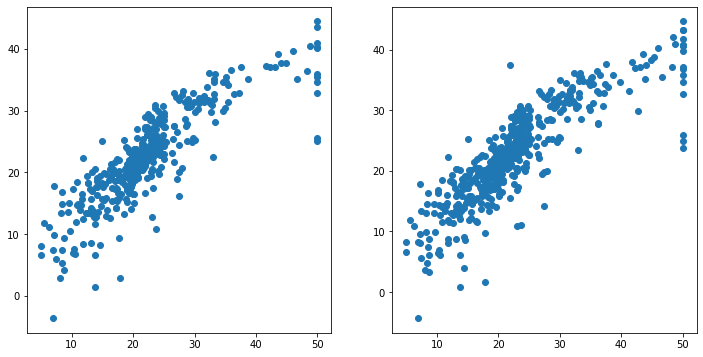

In [683]:
import matplotlib.pyplot as plt

ols_pred = ols.predict(X_train)
fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(Y_train ,ols_pred)

plt.subplot(1,2,2)
reg = LinearRegression().fit(X,y)
pred = reg.predict(X)
plt.scatter(y, pred)

C) Average over 20 samples

In [684]:
avg_mse = []
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .25, shuffle= True)
    GD = Ols()
    GD.fit(X_train, Y_train)
    GD.predict(X_test)
    # avg_mse.append( 1/Y_test.size * np.sum(GD.labels - Y_test)**2)
    avg_mse.append(GD.score(X_test, Y_test))
np.mean(avg_mse)

23.981332606734462

In [687]:
#Checking withh Sklearn
avg_mse_test = []
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .25, shuffle= True)
    reg = LinearRegression()
    reg.fit(X_train,Y_train)
    avg_mse_test.append(mean_squared_error(Y_test, reg.predict(X_test)))

np.mean(avg_mse_test)

23.3188682117804

In [688]:
#AVerage MSE for the training set
avg_mse_train = []
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .25, shuffle= True)
    reg = LinearRegression()
    reg.fit(X_train,Y_train)
    avg_mse_train.append(mean_squared_error(Y_train, reg.predict(X_train)))

np.mean(avg_mse_train)

21.85190618958427

d) T-test-- We see that the Avg MSE for the training set is less than the Avg MSE for the Test set with a 5% significance level (P value = to 0.034)

In [690]:
from scipy import stats
stats.ttest_ind(avg_mse_train, avg_mse_test, alternative= 'less')

Ttest_indResult(statistic=-1.8817938500590112, pvalue=0.03377006358685427)

In [626]:
# Write a new class OlsGd which solves the problem using gradient descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer(Ols):
  def __init__(self):
    pass

  def fit(self, X):
    return np.array(X)

  def predict(self, X):
    self.X = self.fit(X)
    self.norm = self.X = (self.X - self.X.mean()) / self.X.std()
    # self.norm = (X - X.min() )/ (X.max() - X.min())

    return self.norm

class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=100000, #changed to 10,000 for better results
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    #Would like to have check if numpy was imported already

  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting. "Can set IF normalizer =True do GS, else return OLS"
    self.X = self.pad(self.normalizer.predict(X))  # Add padding after the normalizer
    # self.X = self.pad(X)
    self.MSE_log = []
    self.Y = Y


    self.w = np.random.normal(size = (self.X.shape[1])) #random initialization of W's
    iteration = 0
    while iteration < self.num_iteration:
      self.w = self.w - (self.learning_rate * (1/self.Y.size) * self.X.T @ ((self.X @ self.w) - self.Y))
                         #                         Normalize           X               Error
      iteration +=1

     
      self.MSE_log.append(1/self.Y.size * np.sum(((self.X @ self.w) - self.Y)**2))


  def _predict(self, X):
    self.X = X
    self.X = self.normalizer.predict(self.X)
    self.labels = self.pad(self.X) @ self.w #added padding to make dimensionality equal to 14
    
  def _step(self, X, Y):
    # use w update for gradient descent
    pass

In [627]:
# X = grad.pad(X)
grad = OlsGd()
grad._fit(X,y)
grad._predict(X)
y_pred = grad.labels #Adding a pad here didn't help

WARNING TO SELF:

Becareful on the name of the methods.

'_' before belongs to gradient descent, without the '_' does not!

plotting the rate of convergence

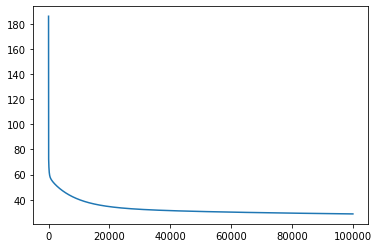

In [628]:
plt.plot(range(grad.num_iteration), grad.MSE_log);

Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).

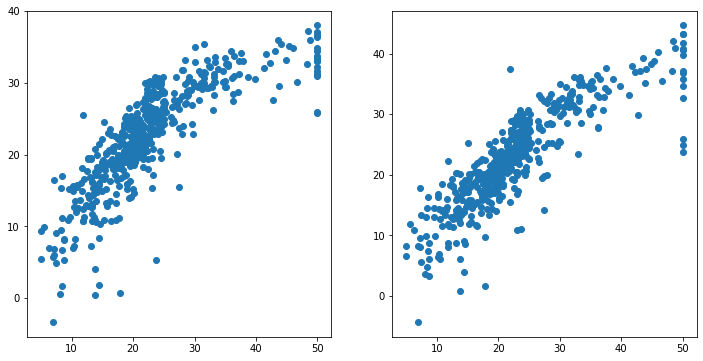

In [629]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(y ,y_pred)

plt.subplot(1,2,2)
reg = LinearRegression().fit(X,y)
pred = reg.predict(X)
plt.scatter(y, pred)

In [611]:
grad.MSE_log[-1]

28.658978260745382

In [632]:
avg_mse = []
for i in range(20):
    GD = OlsGd()
    GD._fit(X_train, Y_train)
    GD._predict(X_test)
    avg_mse.append( 1/Y_test.size * np.sum(GD.labels - Y_test)**2)
np.mean(avg_mse)

16.203071376442

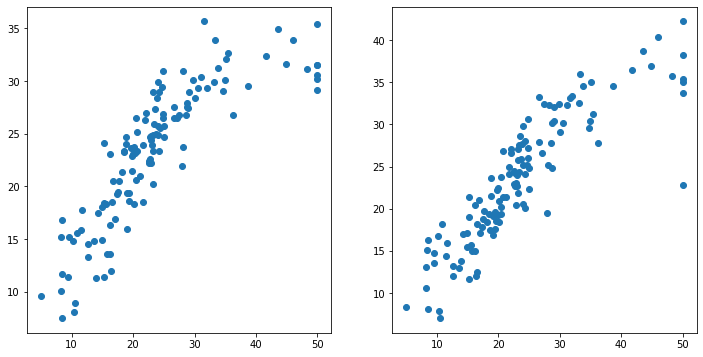

In [631]:
Grad = OlsGd()
Grad._fit(X_train, Y_train)
Grad._predict(X_test)

# fig = plt.figure(figsize= (12,6))
# plt.subplot(1,2,1)
# plt.scatter(Y_test ,GD.labels)
# plt.subplot(1,2,2)

fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(Y_test ,Grad.labels)
plt.subplot(1,2,2)

reg = LinearRegression().fit(X_train, Y_train)
pred = reg.predict(X_test)
plt.scatter(Y_test, pred)

# reg = LinearRegression().fit(X_train, Y_train)
# pred = reg.predict(X_test)
# plt.scatter(Y_test, pred)



## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



In [ ]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    pass

In [ ]:
#Use scikitlearn implementation for OLS, Ridge and Lasso